# IOPS Comparison

In [1]:
%run 'common/plot_iops.py'

### IOPS - HP

In [2]:
plot_measurement_window_tabular('hp/iops/2')

---

### IOPS - RockPro64-256GB

In [3]:
plot_measurement_window_tabular('rockpro64/iops/1')

---

### IOPS - RockPro64-128GB

In [4]:
plot_measurement_window_tabular('rockpro64/iops/2')

---

In [5]:
from matplotlib.ticker import MultipleLocator

_DIR = 'dir'
_MARKER = 'marker'

def plot_iops_comp(profiles):
    block_sizes_chunk_length = 4
    all_block_sizes = [str(bs) for bs in __reverse_block_sizes()]

    for chunk_start in np.arange(0,
                                 len(all_block_sizes),
                                 block_sizes_chunk_length):
        chunk_end = min(chunk_start + block_sizes_chunk_length, len(all_block_sizes))
        _, ax = __create_subplots()

        platforms = []
        bars = []
        block_sizes_in_chunk = list(reversed(BLOCK_SIZES))[chunk_start:chunk_end]
        for plat, attrs in profiles.items():
            platforms.append(plat)
            dirname = attrs[_DIR]
            for bs in block_sizes_in_chunk:
                avg_values = []

                for rwmixread in RWMIXREADS:
                    _, values = __get_avg_iops(dirname, bs, rwmixread)
                    avg_values.append(np.mean(util.get_values_in_window(values)))

                bars.append(ax.errorbar(
                    [__get_rwmix_read2write(rwmixread) for rwmixread in RWMIXREADS],
                    avg_values,
                    fmt=attrs[_MARKER]))

            # reset the color cycle
            # https://stackoverflow.com/a/24283087
            ax.set_prop_cycle(None)

        ax.yaxis.set_minor_locator(MultipleLocator(1000))
        ax.grid(which='major', alpha=0.5)
        ax.grid(which='minor', alpha=0.2)

        ax.set_ylabel('IOPS')
        ax.set_xlabel('R/W Mix %')

        ax.add_artist(plt.legend(
            bars[:len(block_sizes_in_chunk)],
            block_sizes_in_chunk,
            ncol=block_sizes_chunk_length,
            loc=8,
            bbox_to_anchor=(0.5, 1),
            frameon=False))
        plt.legend(bars[::block_sizes_chunk_length],
                   platforms)

        plt.title('IOPS Comparison - ' + platforms[0] + ' vs. ' + platforms[1], y=1.12)
        plt.show()

### HP vs. RockPro64

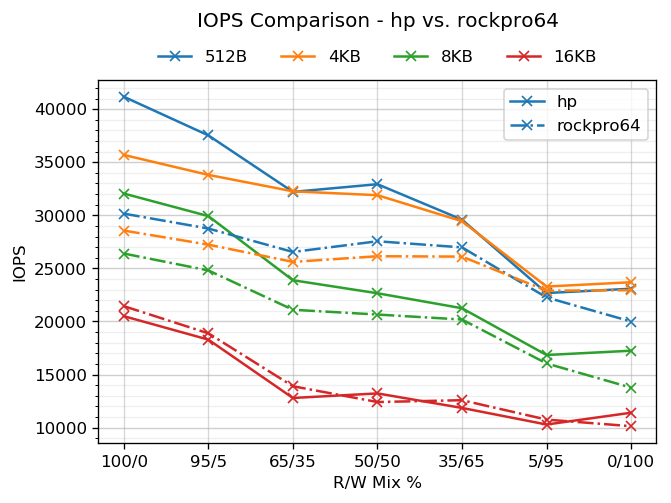

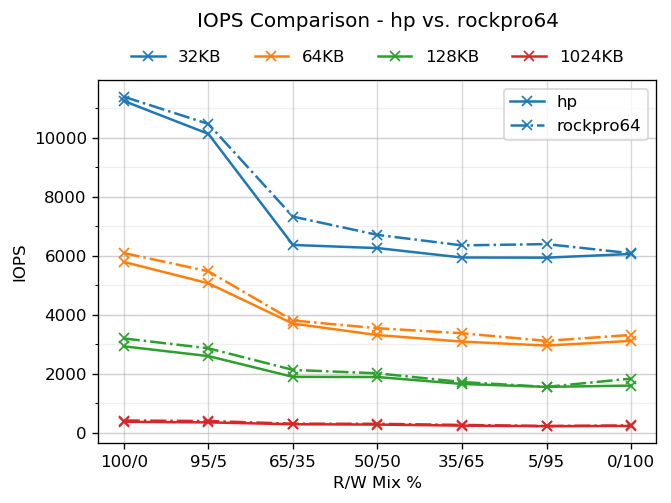

In [6]:
plot_iops_comp({
    'hp':        {_DIR: 'hp/iops/2',
                  _MARKER: '-x'},
    'rockpro64': {_DIR: 'rockpro64/iops/1',
                  _MARKER: '-.x'}
})

### Verification Comparison

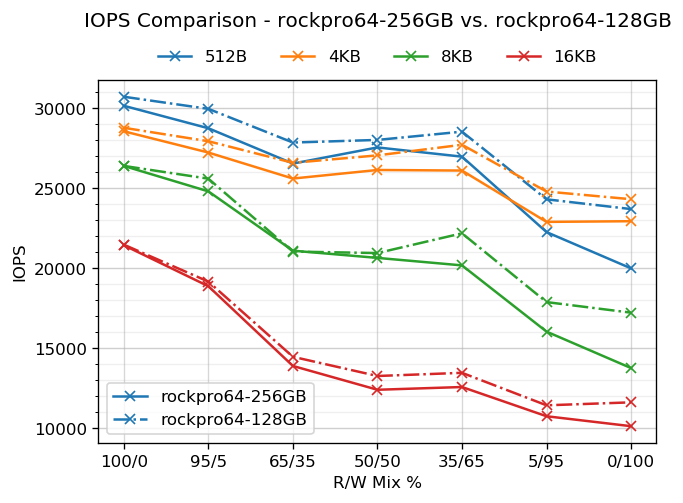

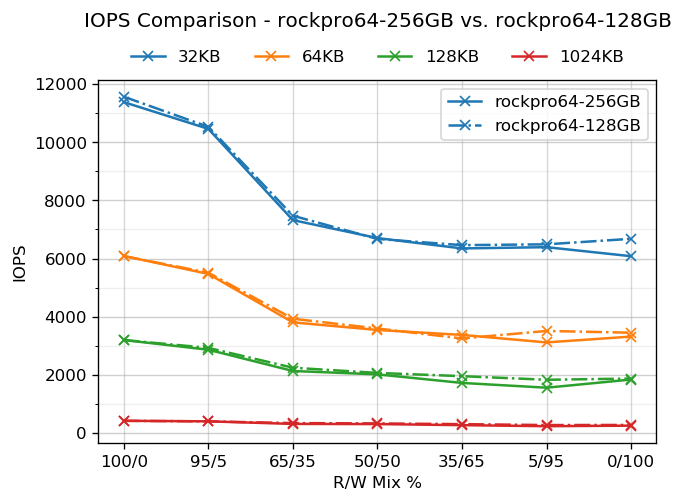

In [7]:
plot_iops_comp({
    'rockpro64-256GB': {_DIR: 'rockpro64/iops/1',
                        _MARKER: '-x'},
    'rockpro64-128GB': {_DIR: 'rockpro64/iops/2',
                        _MARKER: '-.x'}
})